# Final Project: Effects on NYC Public Transportation

**Principal Investigator: Jennifer Kim**

**Email: yk1527@stern.nyu.edu**

This project will study what effects changes on NYC Public Transportation. There are several considerations, including the introduction of Uber, population, and weather. It is easy to believe that there are obvious patterns (more Uber, less public transportation; more population, less usage; bad weather, less usage), but I am interested in exploring this further. 

The key element of the project is the use of datasets from the [New York Metropolitan Transportation Council](https://www.nymtc.org/DATA-AND-MODELING//Transportation-Data-and-Statistics/Publications/Travel-Patterns). This dataset provides usage data over many years. I will be using ridership totals across the following categories: MTA Rail, Buses, Port Authority, and NJ Transit. I will also be using Q1-4 from the years of 2008-2017. 

I also use population data from  weather data from the U.S. Census, and weather data from: https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/data/central_park_weather.csv

## Data Packages

This project will use a variety of packages to manipulate data and produce insightful graphics. A brief description of how each package will be used is given.

In [393]:
import pandas as pd #main package for dataset and visualizations
import matplotlib.pyplot as plt #visualization package
import numpy as np #for numerical functions
import requests #extracting data from APIs

from census import Census #this is the most up-to-date U.S. census data
from us import states
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'
c = Census(my_api_key)

import seaborn as sns #for regression plot visualization
import matplotlib.ticker as mtick #for axes unit formatting on plots

In [493]:
pd.options.mode.chained_assignment = None

**Read in NYC Transit Data**

In [97]:
file = "https://raw.githubusercontent.com/jenniferrkim/public-transport-data-bootcamp-final-project/master/NYCTransitData.csv"
transit_data_raw = pd.read_csv(file)

In [98]:
transit_data_raw.head()

,Bus and Rail RIDERSHIP,Average Q1 2008,Average Q2 2008,Average Q3 2008,Average Q4 2008,Average Q1 2009,Average Q2 2009,Average Q3 2009,Average Q4 2009,Average Q1 2010,...,Average Q3 2015,Average Q4 2015,Average Q1 2016,Average Q2 2016,Average Q3 2016,Average Q4 2016,Average Q1 2017,Average Q2 2017,Average Q3 2017,Average Q4 2017
0,NEW YORK TRANSIT RAIL SYSTEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MTA/NYC Transit Subway,5138104.00,5327590.33,5193139.00,5239010.67,5057695.33,5140976.67,4939108.33,5195035.05,5018490.33,...,5512229.33,5790981.33,5606420.33,5786735.67,5512883.67,5716204.33,5516535.33,5732344.33,5413719.67,5658517.00
2,MTA/Staten Island Railway,16192.67,16014.00,14816.67,15904.00,15236.00,14870.00,13520.33,15413.38,15256.33,...,14976.33,17289.33,16284.33,16533.67,15017.00,15886.33,16124.00,16533.00,15230.67,17766.00
3,MTA/Metro-North Railroad,276133.67,289732.67,291616.67,290999.33,269599.67,277356.33,273540.67,278354.72,265154.00,...,293950.33,298799.00,272927.67,286656.67,283967.67,298962.67,280583.33,296500.00,291286.00,298810.67
4,MTA/Long Island Rail Road,298012.00,312185.33,320050.33,307700.33,281407.00,285942.33,288358.67,285786.94,271101.00,...,311209.67,313049.33,297549.00,312176.67,315976.33,319182.33,302316.67,311645.00,313346.00,317028.00


**Contextualize and Clean Data**

In [494]:
#drop rows that are just category titles
transit_data = transit_data_raw.dropna(axis = 0)

#simplify titles of columns, as we know they are averages, and they currently have a lot of white space
transit_data.columns = ["Transport Type (Specific)", 
                        "2008 Q1", "2008 Q2", "2008 Q3", "2008 Q4",
                        "2009 Q1", "2009 Q2", "2009 Q3", "2009 Q4",
                        "2010 Q1", "2010 Q2", "2010 Q3", "2010 Q4",
                        "2011 Q1", "2011 Q2", "2011 Q3", "2011 Q4",
                        "2012 Q1", "2012 Q2", "2012 Q3", "2012 Q4",
                        "2013 Q1", "2013 Q2", "2013 Q3", "2013 Q4",
                        "2014 Q1", "2014 Q2", "2014 Q3", "2014 Q4",
                        "2015 Q1", "2015 Q2", "2015 Q3", "2015 Q4",
                        "2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4",
                        "2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4"]

#create columns for broad transport type classification (no specific pattern in names so done manually)
transit_data["Transport Type (Broad)"] = ["MTA Rail", "MTA Rail", "MTA Rail", "MTA Rail", "MTA Rail",
                                         "NYC Buses", "NYC Buses", "NYC Buses", "NYC Buses",
                                         "PATH", "PATH", "PATH",
                                         "NJ Rail", "NJ Rail", "NJ Rail", "NJ Rail", "NJ Rail",
                                         "Airport Rail", "Airport Rail", "Airport Rail",
                                         "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses", "Suburban Buses",
                                         "Grand Total"]

#move the Broad transport type category columns to the front
cols = transit_data.columns.tolist()
cols = cols[-1:] + cols[:-1] #move last col to first position
transit_data = transit_data[cols] #rearrange columns according to list

## Ridership Over the Years (2008 - 2017) by Broad Transportation Type ##

We first want to see how ridership has changed over the years in NYC by each broad transportation type. The types are: MTA Rail, NYC Buses, PATH, NJ Rail, Airport Rail, and Suburban Buses. To see how each has changed, we need to first categorize the numbers into each transportation type and combine the numbers for the Quarter into their respective years.

In [196]:
typebyyear = transit_data #create a new dataframe
typebyyear.set_index(["Transport Type (Broad)"], inplace = True) #set index to the transport type, which we will later group by

In [220]:
#want to create total for each quarter for each broad transport type category
typebyyear["2008"] = transit_data.iloc[:, 1:5].sum(axis = 1)
typebyyear["2009"] = transit_data.iloc[:, 5:9].sum(axis = 1)
typebyyear["2010"] = transit_data.iloc[:, 9:13].sum(axis = 1)
typebyyear["2011"] = transit_data.iloc[:, 13:17].sum(axis = 1)
typebyyear["2012"] = transit_data.iloc[:, 17:21].sum(axis = 1)
typebyyear["2013"] = transit_data.iloc[:, 21:25].sum(axis = 1)
typebyyear["2014"] = transit_data.iloc[:, 25:29].sum(axis = 1)
typebyyear["2015"] = transit_data.iloc[:, 29:33].sum(axis = 1)
typebyyear["2016"] = transit_data.iloc[:, 33:37].sum(axis = 1)
typebyyear["2017"] = transit_data.iloc[:, 37:41].sum(axis = 1)

#grab only the new year columns
typebyyear2 = typebyyear[typebyyear.columns[41:]]

typebyyear2.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Transport Type (Broad),,,,,,,,,,
MTA Rail,20897844.00,20332815.38,20608661.60,21072461.89,21529235.67,21865879.34,22389314.00,22593500.99,22622244.00,22321116.33
MTA Rail,62927.34,59039.71,61697.46,63893.22,64056.00,60243.33,61841.67,64044.32,63721.33,65653.67
MTA Rail,1148482.34,1098851.39,1113958.34,1125794.34,1125328.33,1136708.33,1157361.66,1158303.33,1142514.68,1167180.00
MTA Rail,1237947.99,1141494.94,1129432.33,1132992.01,1140329.33,1162107.66,1193790.33,1219366.00,1244884.33,1244335.67
MTA Rail,23347201.66,22632201.41,22913749.73,23395141.44,23858949.34,24224938.67,24802307.68,25035214.67,25073364.34,24798285.33


Now that we have categorized all the Quarters into their respective years, we need to sum up each minute transportation option into their respective, more general category. To do this, we will use groupby.

In [339]:
typebyyear2 = typebyyear2.groupby(["Transport Type (Broad)"]).sum() #add up ridership for each category

typebyyeardrop = typebyyear2.drop("Grand Total", axis = 0)

typebyyeardrop

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Transport Type (Broad),,,,,,,,,,
Airport Rail,182624.90,139186.01,156735.70,167062.04,171100.88,183670.01,189253.50,211953.42,215460.12,230542.77
MTA Rail,46694403.33,45264402.83,45827499.46,46790282.90,47717898.67,48449877.33,49604615.34,50070429.31,50146728.68,49596571.00
NJ Rail,2842500.00,2706600.00,2663400.00,2854600.00,2856700.00,2946300.00,3082400.00,3182400.00,3210200.00,3117100.00
NYC Buses,22233213.83,21702591.23,20962959.21,20197426.00,20507348.34,20615538.44,20254989.77,19758086.21,19576732.87,18575939.89
PATH,2021611.99,1948091.36,1975068.02,2047458.65,1928940.66,1955451.35,1998495.34,2062100.68,2152024.67,2269035.34
Suburban Buses,6652844.70,6420271.51,6371018.48,6316516.29,6430494.90,6434628.75,6392812.98,6279101.63,6146981.97,5961321.74


In [292]:
typebyyear3 = typebyyeardrop.transpose()

typebyyear3.index = pd.to_numeric(typebyyear3.index) #years are strings, need to convert to int

typebyyear3.head()

Transport Type (Broad),Airport Rail,MTA Rail,NJ Rail,NYC Buses,PATH,Suburban Buses
2008,182624.90,46694403.33,2842500.0,22233213.83,2021611.99,6652844.70
2009,139186.01,45264402.83,2706600.0,21702591.23,1948091.36,6420271.51
2010,156735.70,45827499.46,2663400.0,20962959.21,1975068.02,6371018.48
2011,167062.04,46790282.90,2854600.0,20197426.00,2047458.65,6316516.29
2012,171100.88,47717898.67,2856700.0,20507348.34,1928940.66,6430494.90


Now plot!

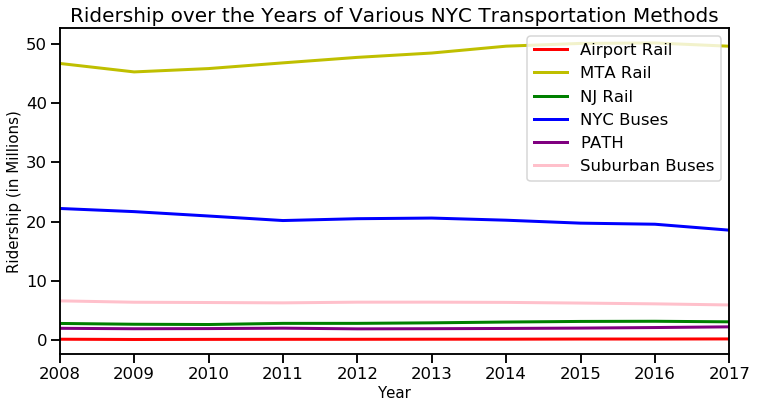

In [313]:
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(typebyyear3.index, typebyyear3["Airport Rail"] / 1000000, color = 'r', linewidth = 3, label = "Airport Rail")
ax1.plot(typebyyear3.index, typebyyear3["MTA Rail"] / 1000000, color = 'y', linewidth = 3, label = "MTA Rail")
ax1.plot(typebyyear3.index, typebyyear3["NJ Rail"] / 1000000, color = 'g', linewidth = 3, label = "NJ Rail")
ax1.plot(typebyyear3.index, typebyyear3["NYC Buses"] / 1000000, color = 'b', linewidth = 3, label = "NYC Buses")
ax1.plot(typebyyear3.index, typebyyear3["PATH"] / 1000000, color = 'purple', linewidth = 3, label = "PATH")
ax1.plot(typebyyear3.index, typebyyear3["Suburban Buses"] / 1000000, color = 'pink', linewidth = 3, label = "Suburban Buses")

ax1.set_title("Ridership over the Years of Various NYC Transportation Methods", fontsize = 20)
ax1.title.set_position([.5, 1])

ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Ridership (in Millions)", fontsize = 15)

ax1.set_xlim(2008, 2017)

ax1.legend(loc=1)

plt.show()

Here we see that the NYC Buses and MTA Rail have the greatest use compared to the other four transportation methods.

## Effect of Uber on Public Transportation ##

Now, I am curious as to what effect there was when Uber entered NYC. First, I will show on the graph the time when Uber entered the city.

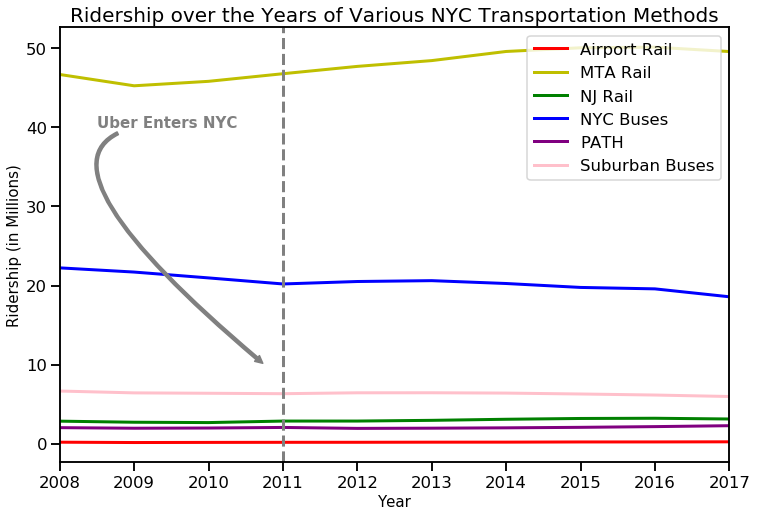

In [335]:
fig, ax1 = plt.subplots(figsize = (12, 8))

ax1.plot(typebyyear3.index, typebyyear3["Airport Rail"] / 1000000, color = 'r', linewidth = 3, label = "Airport Rail")
ax1.plot(typebyyear3.index, typebyyear3["MTA Rail"] / 1000000, color = 'y', linewidth = 3, label = "MTA Rail")
ax1.plot(typebyyear3.index, typebyyear3["NJ Rail"] / 1000000, color = 'g', linewidth = 3, label = "NJ Rail")
ax1.plot(typebyyear3.index, typebyyear3["NYC Buses"] / 1000000, color = 'b', linewidth = 3, label = "NYC Buses")
ax1.plot(typebyyear3.index, typebyyear3["PATH"] / 1000000, color = 'purple', linewidth = 3, label = "PATH")
ax1.plot(typebyyear3.index, typebyyear3["Suburban Buses"] / 1000000, color = 'pink', linewidth = 3, label = "Suburban Buses")

ax1.set_title("Ridership over the Years of Various NYC Transportation Methods", fontsize = 20)
ax1.title.set_position([.5, 1])

ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Ridership (in Millions)", fontsize = 15)

ax1.set_xlim(2008, 2017)

ax1.legend(loc=1)

#adding line to indicate when Uber entered the space
plt.axvline(x = 2011., color = "gray", linewidth = 3.0, linestyle = "--")

ax1.annotate("Uber Enters NYC", 
             xy = (2010.75, 10), 
             xytext = (2008.5, 40), 
             fontsize = 15,
             fontweight = "bold", 
             color = "gray", 
             arrowprops = {
                 "arrowstyle": "simple",
                 "connectionstyle": "angle3, angleA = 3, angleB = 140",
                 "color": "gray"})

plt.show()

It seems as though there is no obvious change to the eye just by this graph. To dig deeper, we can see what the % change year over year is. 

In [377]:
#finding % change year over year
typebyyoy = typebyyeardrop

i=0
df = pd.DataFrame()
while i < 9:
    df[i] = ((typebyyoy.iloc[:, i+1] - typebyyoy.iloc[:, i]) / typebyyoy.iloc[:, i])*100
    df.append(df[i])
    i = i +1

typebyyoy = df[0:9]

#rename columns
typebyyoy.columns = [2009, 2010, 2011,
                     2012, 2013, 2014,
                     2015, 2016, 2017]

typebyyoy

,2009,2010,2011,2012,2013,2014,2015,2016,2017
Transport Type (Broad),,,,,,,,,
Airport Rail,-23.785853,12.608803,6.588378,2.417569,7.346035,3.039957,11.994452,1.654467,7.000205
MTA Rail,-3.062467,1.244016,2.100886,1.982497,1.533971,2.383366,0.939054,0.152384,-1.097096
NJ Rail,-4.781003,-1.596098,7.178794,0.073565,3.136486,4.619353,3.244225,0.873555,-2.900131
NYC Buses,-2.386621,-3.408036,-3.651838,1.534465,0.527567,-1.748917,-2.453240,-0.917869,-5.112155
PATH,-3.636733,1.384774,3.665222,-5.788541,1.374365,2.201230,3.182661,4.360795,5.437236
Suburban Buses,-3.495846,-0.767149,-0.855471,1.804454,0.064285,-0.649855,-1.778737,-2.104117,-3.020348


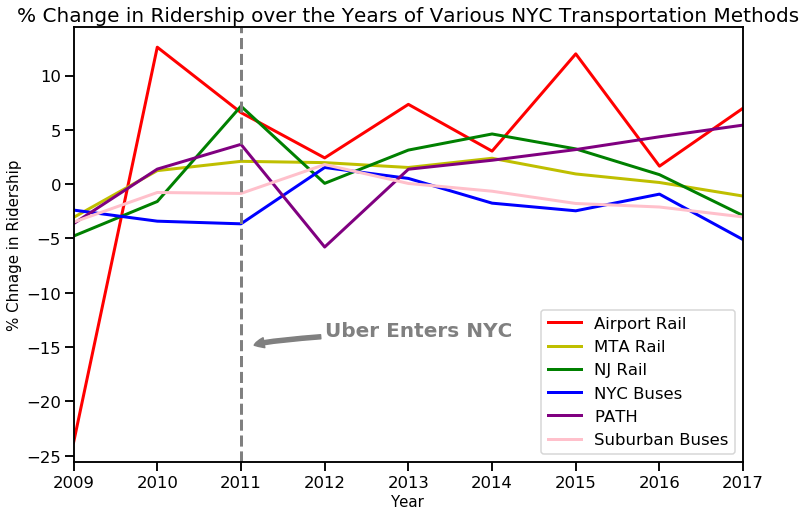

In [392]:
typebyyoyT = typebyyoy.transpose()
fig, ax1 = plt.subplots(figsize = (12, 8))

ax1.plot(typebyyoyT.index, typebyyoyT["Airport Rail"], color = 'r', linewidth = 3, label = "Airport Rail")
ax1.plot(typebyyoyT.index, typebyyoyT["MTA Rail"], color = 'y', linewidth = 3, label = "MTA Rail")
ax1.plot(typebyyoyT.index, typebyyoyT["NJ Rail"], color = 'g', linewidth = 3, label = "NJ Rail")
ax1.plot(typebyyoyT.index, typebyyoyT["NYC Buses"], color = 'b', linewidth = 3, label = "NYC Buses")
ax1.plot(typebyyoyT.index, typebyyoyT["PATH"], color = 'purple', linewidth = 3, label = "PATH")
ax1.plot(typebyyoyT.index, typebyyoyT["Suburban Buses"], color = 'pink', linewidth = 3, label = "Suburban Buses")

ax1.set_title("% Change in Ridership over the Years of Various NYC Transportation Methods", fontsize = 20)
ax1.title.set_position([.5, 1])

ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("% Chnage in Ridership", fontsize = 15)

ax1.set_xlim(2009, 2017)

#adding line to indicate when Uber entered the space
plt.axvline(x = 2011., color = "gray", linewidth = 3.0, linestyle = "--")

ax1.annotate("Uber Enters NYC", 
             xy = (2011.15, -15), 
             xytext = (2012, -14), 
             fontsize = 20,
             fontweight = "bold", 
             color = "gray", 
             arrowprops = {
                 "arrowstyle": "simple",
                 "connectionstyle": "angle3, angleA = 3, angleB = 140",
                 "color": "gray"})

ax1.legend()

plt.show()

It seems that immediately after, most transportation use went down, except for Suburban buses and NYC buses. Perhaps this is because those who ride buses are usually those who do not have the means to pay for a private car.

Overall, it looks as though the Airport Rail is the most volatile, while others, especially the NYC buses, MTA rail, and suburban buses usage stay pretty constant.

However, we cannot draw any real conclusions from this and still do not know if the changes are significant.

## Ridership per Person: Using U.S. Census Population Data ##

To take away effects of people moving in and out of the city, we can take into account changes in population. Recently, there has been a decrease in population due to a migration of people outside of cities. We can see if that applies here by graphing ridership per person in Manhattan. 

This data is taken from the U.S. Census. 

In [477]:
#Using the U.S. Census to grab New York population data 
# combine data frames for each borough in nyc
code = ("NAME", "B01001_001E")
bronx_pop_2009 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2009))
bronx_pop_2010 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2010))
bronx_pop_2011 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2011))
bronx_pop_2012 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2012))
bronx_pop_2013 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2013))
bronx_pop_2014 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2014))
bronx_pop_2015 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2015))
bronx_pop_2016 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2016))
bronx_pop_2017 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "005", year=2017))
bronx_pop = bronx_pop_2009.append([bronx_pop_2010, bronx_pop_2011, bronx_pop_2012, bronx_pop_2013, bronx_pop_2014, bronx_pop_2015, bronx_pop_2016, bronx_pop_2017], ignore_index=True)
bronx_pop_total = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "Total Population": bronx_pop["B01001_001E"]})

brooklyn_pop_2009 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2009))
brooklyn_pop_2010 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2010))
brooklyn_pop_2011 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2011))
brooklyn_pop_2012 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2012))
brooklyn_pop_2013 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2013))
brooklyn_pop_2014 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2014))
brooklyn_pop_2015 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2015))
brooklyn_pop_2016 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2016))
brooklyn_pop_2017 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "047", year=2017))
brooklyn_pop = brooklyn_pop_2009.append([brooklyn_pop_2010, brooklyn_pop_2011, brooklyn_pop_2012, brooklyn_pop_2013, brooklyn_pop_2014, brooklyn_pop_2015, brooklyn_pop_2016, brooklyn_pop_2017], ignore_index=True)
brooklyn_pop_total = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "Total Population": brooklyn_pop["B01001_001E"]})

manhattan_pop_2009 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2009))
manhattan_pop_2010 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2010))
manhattan_pop_2011 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2011))
manhattan_pop_2012 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2012))
manhattan_pop_2013 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2013))
manhattan_pop_2014 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2014))
manhattan_pop_2015 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2015))
manhattan_pop_2016 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2016))
manhattan_pop_2017 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "061", year=2017))
manhattan_pop = manhattan_pop_2009.append([manhattan_pop_2010, manhattan_pop_2011, manhattan_pop_2012, manhattan_pop_2013, manhattan_pop_2014, manhattan_pop_2015, manhattan_pop_2016, manhattan_pop_2017], ignore_index=True)
manhattan_pop_total = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "Total Population": manhattan_pop["B01001_001E"]})

queens_pop_2009 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2009))
queens_pop_2010 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2010))
queens_pop_2011 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2011))
queens_pop_2012 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2012))
queens_pop_2013 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2013))
queens_pop_2014 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2014))
queens_pop_2015 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2015))
queens_pop_2016 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2016))
queens_pop_2017 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "081", year=2017))
queens_pop = queens_pop_2009.append([queens_pop_2010, queens_pop_2011, queens_pop_2012, queens_pop_2013, queens_pop_2014, queens_pop_2015, queens_pop_2016, queens_pop_2017], ignore_index=True)
queens_pop_total = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "Total Population": queens_pop["B01001_001E"]})

staten_pop_2009 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2009))
staten_pop_2010 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2010))
staten_pop_2011 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2011))
staten_pop_2012 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2012))
staten_pop_2013 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2013))
staten_pop_2014 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2014))
staten_pop_2015 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2015))
staten_pop_2016 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2016))
staten_pop_2017 = pd.DataFrame(c.acs5.state_county(code, states.NY.fips, "085", year=2017))
staten_pop = staten_pop_2009.append([staten_pop_2010, staten_pop_2011, staten_pop_2012, staten_pop_2013, staten_pop_2014, staten_pop_2015, staten_pop_2016, staten_pop_2017], ignore_index=True)
staten_pop_total = pd.DataFrame({'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], "Total Population": staten_pop["B01001_001E"]})

In [478]:
# combine then group and sum all population from boroughs for total nyc pop
nyc_pop = bronx_pop_total.append([brooklyn_pop_total, manhattan_pop_total, queens_pop_total, staten_pop_total])
nyc_pop["Total Population"] = pd.to_numeric(nyc_pop.iloc[:, 1])
nyc_pop_total = nyc_pop.groupby(['Year']).sum()
nyc_pop_total.head()

,Total Population
Year,
2009,8302659.0
2010,8078471.0
2011,8128980.0
2012,8199221.0
2013,8268999.0


In [479]:
# prepare data frame for division by removing extra column
transit_type_by_year = typebyyear2.rename_axis("Year")
transit_type_by_year_prep = transit_type_by_year.drop(['2008'], axis=1)
transit_type_by_year_prep

,2009,2010,2011,2012,2013,2014,2015,2016,2017
Year,,,,,,,,,
Airport Rail,139186.01,156735.70,167062.04,171100.88,183670.01,189253.50,211953.42,215460.12,230542.77
Grand Total,39086268.55,38978340.42,39186672.28,39806241.74,40292732.91,40761283.82,40782035.65,40724064.16,39875255.38
MTA Rail,45264402.83,45827499.46,46790282.90,47717898.67,48449877.33,49604615.34,50070429.31,50146728.68,49596571.00
NJ Rail,2706600.00,2663400.00,2854600.00,2856700.00,2946300.00,3082400.00,3182400.00,3210200.00,3117100.00
NYC Buses,21702591.23,20962959.21,20197426.00,20507348.34,20615538.44,20254989.77,19758086.21,19576732.87,18575939.89
PATH,1948091.36,1975068.02,2047458.65,1928940.66,1955451.35,1998495.34,2062100.68,2152024.67,2269035.34
Suburban Buses,6420271.51,6371018.48,6316516.29,6430494.90,6434628.75,6392812.98,6279101.63,6146981.97,5961321.74


In [480]:
# divide ridership over nyc population
transit_type_over_population = transit_type_by_year_prep / nyc_pop_total["Total Population"].values.astype(float)
transit_type_over_population = transit_type_over_population.rename(index=str, columns={"2009": "2009 rides per person", "2010": "2010 rides per person", "2011": "2011 rides per person", "2012": "2012 rides per person", "2013": "2013 rides per person", "2014": "2014 rides per person", "2015": "2015 rides per person", "2016": "2016 rides per person", "2017": "2017 rides per person"})
transit_type_over_population.head()

,2009 rides per person,2010 rides per person,2011 rides per person,2012 rides per person,2013 rides per person,2014 rides per person,2015 rides per person,2016 rides per person,2017 rides per person
Year,,,,,,,,,
Airport Rail,0.016764,0.019402,0.020551,0.020868,0.022212,0.022652,0.025152,0.025462,0.026932
Grand Total,4.707681,4.824965,4.820614,4.854881,4.872746,4.878734,4.839596,4.812604,4.658285
MTA Rail,5.451796,5.672794,5.755985,5.819809,5.859219,5.937196,5.941848,5.926136,5.793943
NJ Rail,0.325992,0.329691,0.351163,0.348411,0.356307,0.368934,0.377655,0.379368,0.364144
NYC Buses,2.613933,2.594917,2.484620,2.501134,2.493112,2.424328,2.344688,2.313498,2.170068


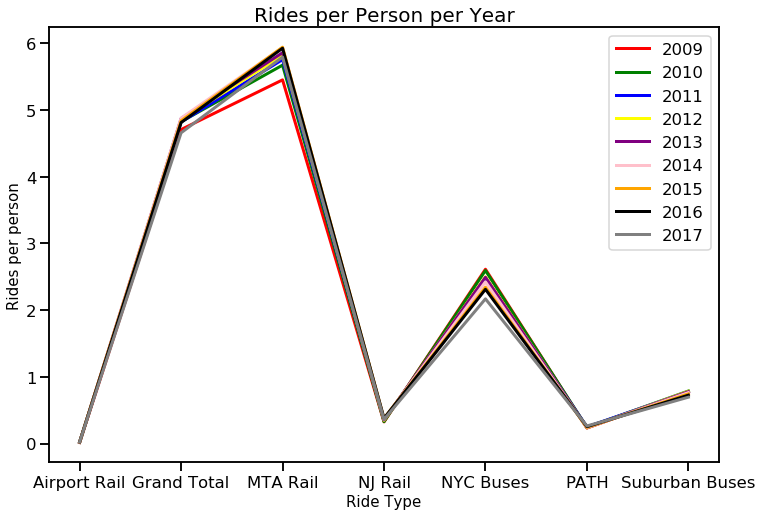

In [496]:
# graphing rides per person

fig, ax1 = plt.subplots(figsize = (12, 8))

ax1.plot(transit_type_over_population.index, transit_type_over_population["2009 rides per person"], 
         color = 'r', linewidth = 3, label = "2009")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2010 rides per person"], 
         color = 'g', linewidth = 3, label = "2010")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2011 rides per person"], 
         color = 'b', linewidth = 3, label = "2011")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2012 rides per person"], 
         color = 'yellow', linewidth = 3, label = "2012")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2013 rides per person"], 
         color = 'purple', linewidth = 3, label = "2013")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2014 rides per person"], 
         color = 'pink', linewidth = 3, label = "2014")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2015 rides per person"], 
         color = 'orange', linewidth = 3, label = "2015")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2016 rides per person"], 
         color = 'black', linewidth = 3, label = "2016")
ax1.plot(transit_type_over_population.index, transit_type_over_population["2017 rides per person"], 
         color = 'grey', linewidth = 3, label = "2017")

ax1.set_title("Rides per Person per Year", fontsize = 20)
ax1.title.set_position([.5, 1])

ax1.set_xlabel("Ride Type", fontsize = 15)
ax1.set_ylabel("Rides per person", fontsize = 15)

ax1.legend()

plt.show()

We can see that ridership per person appears to be constant over the years. Since these methods of transportation go in and out of the city and into the suburbs, it appears that maybe migration to the suburbs over the years hasn't affected public transport use.

## Ridership and Weather ##

Moving on from the effects of Uber and population, I was also interested in seeing how the weather, or more specifically, the amount of precipitation and snowfall, affects ridership.

In [397]:
#read in the weather file
fileWeather = "https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/data/central_park_weather.csv"
weather = pd.read_csv(fileWeather)
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-01,11.18,0.0,0.0,0.0,26,15
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-02,6.26,0.0,0.0,0.0,34,23
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-03,10.07,0.0,0.0,0.0,38,29
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-04,7.61,0.0,0.0,0.0,42,25
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2009-01-05,6.93,0.0,0.0,0.0,43,38


In [398]:
#define a function that takes the dates and splits each date into quarters of the respective years
def split_by_quarter(date):
    split_date = date.split('-')
    q = int(split_date[1])
    if q <= 3:
        q = 1
    elif q > 3 and q <= 6:
        q = 2
    elif q > 6 and q <= 9:
        q = 3
    else:
        q = 4
    return split_date[0] + ' Q' + str(q)

In [403]:
#rename each column
rain_snow = pd.DataFrame({'Date': weather['DATE'], 'Precipitation': weather['PRCP'], 'Snowfall': weather['SNOW']})

#apply method to split dates into quarters and clean up dataset
rain_snow['Quarter'] = rain_snow['Date'].apply(split_by_quarter)
rain_snow_by_quarter = rain_snow.drop(['Date'], axis=1)
rain_snow_by_quarter = rain_snow_by_quarter.groupby(['Quarter']).sum()

rain_snow_by_quarter.head()

,Precipitation,Snowfall
Quarter,,
2009 Q1,5.66,21.6
2009 Q2,19.91,0.0
2009 Q3,13.59,0.0
2009 Q4,14.46,12.4
2010 Q1,19.46,39.0


In [404]:
#dataframe that groups each type of transportation by quarter to combine with weather dataframe
transit_type_by_quarter = transit_data[transit_data.columns[:41]].groupby(["Transport Type (Broad)"]).sum().T
transit_type_by_quarter = transit_type_by_quarter.rename_axis("Quarter")
transit_type_by_quarter.head()

Transport Type (Broad),Airport Rail,Grand Total,MTA Rail,NJ Rail,NYC Buses,PATH,Suburban Buses
Quarter,,,,,,,
2008 Q1,48104.66,9875354.00,11456884.67,681900.0,5492012.67,492174.67,1579631.33
2008 Q2,56680.66,10296357.00,11891044.66,714000.0,5713352.01,513818.66,1703818.00
2008 Q3,40455.58,10048283.64,11639245.34,729000.0,5450016.56,514926.00,1722923.82
2008 Q4,37384.00,10093604.73,11707228.66,717600.0,5577832.59,500692.66,1646471.55
2009 Q1,30646.00,9730696.96,11247876.00,658700.0,5509373.84,485107.34,1529690.75


In [405]:
#combine ridership dataframe and weather dataframe by quarter
transit_type_and_weather = transit_type_by_quarter.join(rain_snow_by_quarter, on='Quarter').dropna()
transit_type_and_weather.head()

,Airport Rail,Grand Total,MTA Rail,NJ Rail,NYC Buses,PATH,Suburban Buses,Precipitation,Snowfall
Quarter,,,,,,,,,
2009 Q1,30646.00,9730696.96,11247876.00,658700.0,5509373.84,485107.34,1529690.75,5.66,21.6
2009 Q2,35293.33,9899361.72,11438290.66,672200.0,5561328.26,488569.34,1603041.85,19.91,0.0
2009 Q3,36051.34,9509110.65,11029056.00,684900.0,5138566.64,485881.34,1643765.99,13.59,0.0
2009 Q4,37195.34,9947099.22,11549180.17,690800.0,5493322.49,488533.34,1643772.92,14.46,12.4
2010 Q1,34375.62,9531632.29,11140003.33,659700.0,5216951.18,472845.34,1539389.11,19.46,39.0


In [461]:
precipMin = transit_type_and_weather["Precipitation"].min()
precipMax = transit_type_and_weather["Precipitation"].max()
precip25th = np.percentile(transit_type_and_weather["Precipitation"], 25)
precip50th = np.percentile(transit_type_and_weather["Precipitation"], 50)
precip75th = np.percentile(transit_type_and_weather["Precipitation"], 75)

First, since airport rail ridership seems to be the most volatile, I want to see how this category's ridership has been affected by the amount of precipitation.  

In [468]:
MTA1 = 0
MTA2 = 0
MTA3 = 0
MTA4 = 0

i = 0
while i < len(transit_type_and_weather["Precipitation"]):
    if transit_type_and_weather["Precipitation"][i] <= precip25th:
        MTA1 = MTA1 + transit_type_and_weather["Airport Rail"][i]
    elif transit_type_and_weather["Precipitation"][i] > precip25th and transit_type_and_weather["Precipitation"][i] <= precip50th:
        MTA2 = MTA2 + transit_type_and_weather["Airport Rail"][i]
    elif transit_type_and_weather["Precipitation"][i] > precip50th and transit_type_and_weather["Precipitation"][i] <= precip75th:
        MTA3 = MTA3 + transit_type_and_weather["Airport Rail"][i]
    else:
        MTA4 = MTA4 + transit_type_and_weather["Airport Rail"][i]
    i = i+1
        
mtadf = pd.Series([MTA1, MTA2, MTA3, MTA4], index = ['Q1', 'Q2',
                                                    'Q3', 'Q4'])
mtadf = mtadf.to_frame()

mtadf

,0
Q1,429050.19
Q2,427292.30
Q3,417855.37
Q4,390766.59


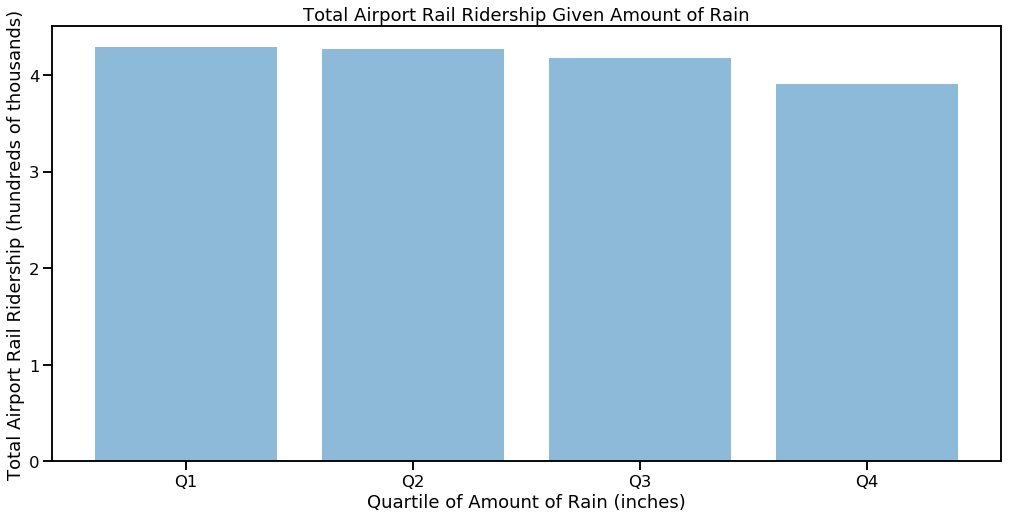

In [476]:
plt.figure(figsize=(17,8))
plt.bar(mtadf.index, mtadf[0] / 100000, align='center', alpha=0.5)
y_pos = np.arange(len(mtadf.index))
plt.xticks(y_pos, mtadf.index)
plt.ylabel('Total Airport Rail Ridership (hundreds of thousands)')
plt.xlabel('Quartile of Amount of Rain (inches)')
plt.title('Total Airport Rail Ridership Given Amount of Rain')

plt.show()

It appears that airport ridership does seem to decrease with more rain. It would be interesting to see how all the transportation types are affected with both rain and snow. 

A bar graph isn't very telling of significance; let's look at some regressions.

In [481]:
# iterate through each column excluding precipitation and snowfall
# assign value to transit type col according to each ridership value
# alongside preciptation and snowfall for that quarter
types = transit_type_and_weather.columns.tolist()
expanded_transit_type = pd.DataFrame()
for i in np.arange(len(types) - 2):
    values = transit_type_and_weather[types[i]].values
    precip = transit_type_and_weather[types[len(types) - 2]].values
    snow = transit_type_and_weather[types[len(types) - 1]].values
    # iterate through each quarter for each transit type
    for j in np.arange(len(values)):
        temp = pd.DataFrame({'Transit Type': [types[i]], 'Ridership': [values[j]], 'Precipitation': [precip[j]], 'Snowfall': [snow[j]]})
        expanded_transit_type = expanded_transit_type.append(temp, ignore_index=True)
expanded_transit_type.head()

,Transit Type,Ridership,Precipitation,Snowfall
0,Airport Rail,30646.00,5.66,21.6
1,Airport Rail,35293.33,19.91,0.0
2,Airport Rail,36051.34,13.59,0.0
3,Airport Rail,37195.34,14.46,12.4
4,Airport Rail,34375.62,19.46,39.0


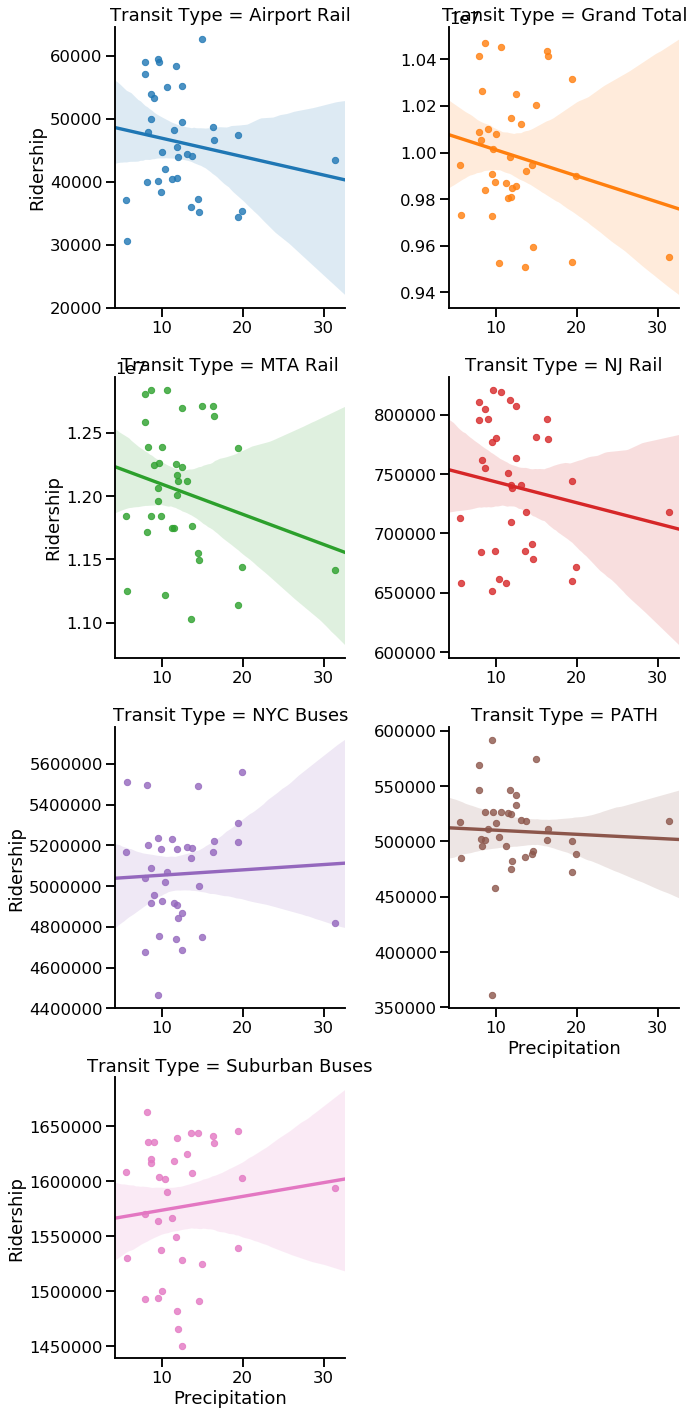

In [497]:
sns.lmplot(
    x="Precipitation",
    y="Ridership",
    data=expanded_transit_type,
    hue='Transit Type',
    col='Transit Type',
    col_wrap=2,
    scatter_kws={'s':40},
    sharex=False,
    sharey=False
);

These are graphs of how ridership is affected by rainfall. In general, transportation seems to decrease with increased rain; however, there are some exceptions, including both buses and the PATH. 

But in general, we see that the Grand Total decreases with an increase in rainfall, suggesting public transportation use goes down with more rain (although this may be heavily influenced by MTA rail, which has the highest use). 

In addition, the shaded region indicates confidence interval. We see that the confidence interval is very wide especially as the amount of rainfall increases, so this conclusion must not be taken as fact. 

Now, let's look at snowfall.

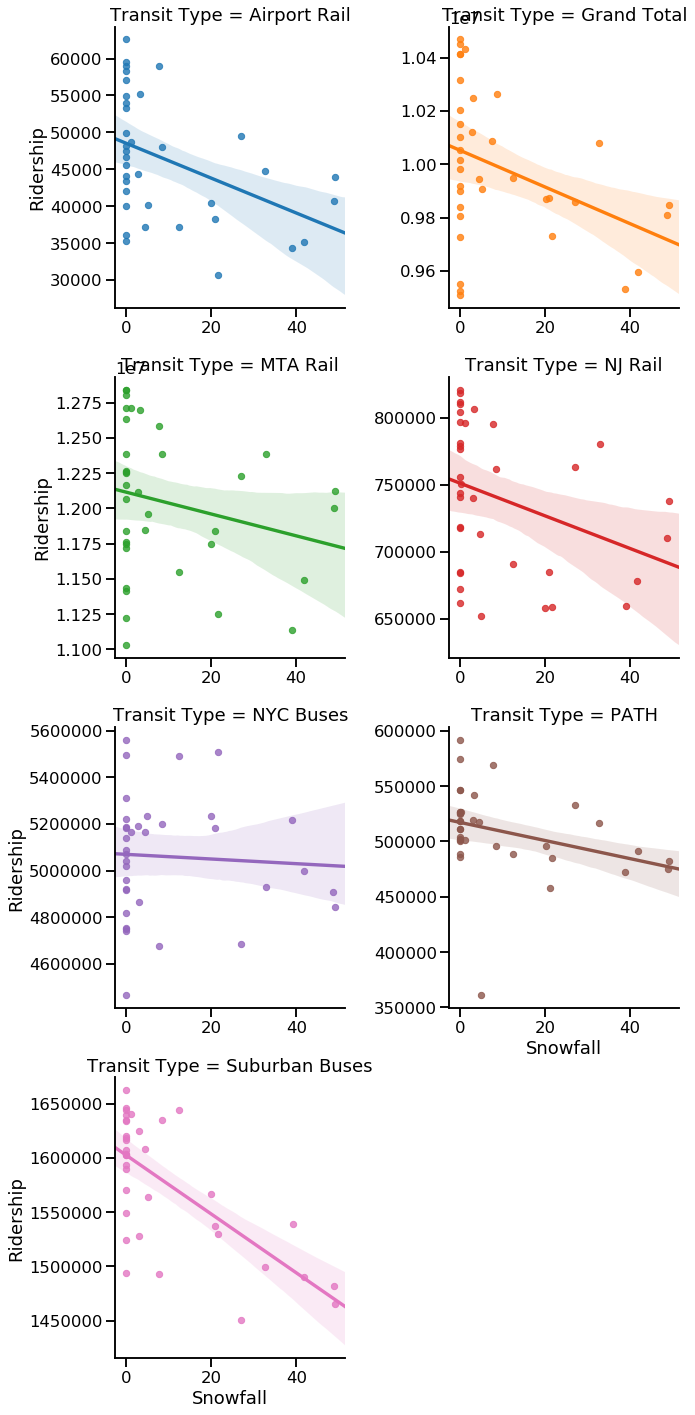

In [483]:
sns.lmplot(
    x="Snowfall",
    y="Ridership",
    data=expanded_transit_type,
    hue='Transit Type',
    col='Transit Type',
    col_wrap=2,
    scatter_kws={'s':40},
    sharex=False,
    sharey=False,
    x_jitter=.1
);

Here, we see that snow seems to affect transit more than rain. All the categories of transportation have downwards sloping regression lines, and the confidence intervals are significantly narrower. This seems to confirm what we already know: snowfall means we do not want to get out of the house, let alone take public transportation.

## Conclusion ##

This project set out to answer the question: What effects ridership of NYC Public Transportation? 

We looked at Uber, population, and weather. 

Becuase Uber does not release any large amounts of their data on ridership, it is hard to draw conclusions on what happened to public transportation based on just their date of entrance. 

We then looked at population. It seems that all the transportation types are affected by population changes equally over the years.

Finally, we looked at weather data. This is where we could really draw some conclusions. We saw that both rainfall and snowfall affects ridership, but snowfall more so, as there are strong correlations between the amount of snow and decrease in ridership across all the transportation categories. This is likely because of the presence of snow days, which means public transportation also shuts down. 